<a href="https://colab.research.google.com/github/rameshavinash94/CMPE-255-Assignment-1/blob/main/Hotel_Booking_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>HOTEL BOOKING DATASET</b></center><h1>

**ABOUT THE DATASET:**

*This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.*


**DATASET**: https://www.kaggle.com/jessemostipak/hotel-booking-demand

## **DOWNLOADING DATASET & INSTALLING MODULES FOR ANALYSIS**

In [ ]:
#installing kaggle in colab and copying kaggle account key
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Download Kaggle Hotel Booking Dataset. URL: https://www.kaggle.com/jessemostipak/hotel-booking-demand**

In [ ]:
#download data from kaggle with below coomand
! kaggle datasets download jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 42.1MB/s]


In [ ]:
#unzip the file contents
! unzip /content/hotel-booking-demand.zip

Archive:  /content/hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


In [ ]:
#just head few contents of the unzipped file to verify extraction process
!head /content/hotel_bookings.csv

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporat

## **IMPORTING LIBRARIES & LOADING DATASET**

In [ ]:
#importing necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import folium
import plotly.express as px

In [ ]:
#loading data in pandas dataframe
dataset = pd.read_csv("/content/hotel_bookings.csv")
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **UNDERSTANDING DATA**

In [ ]:
#checking dataset shape
dataset.shape

(119390, 32)

In [ ]:
#understanding the columns, count of rows and non-null value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking null values in each column.
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

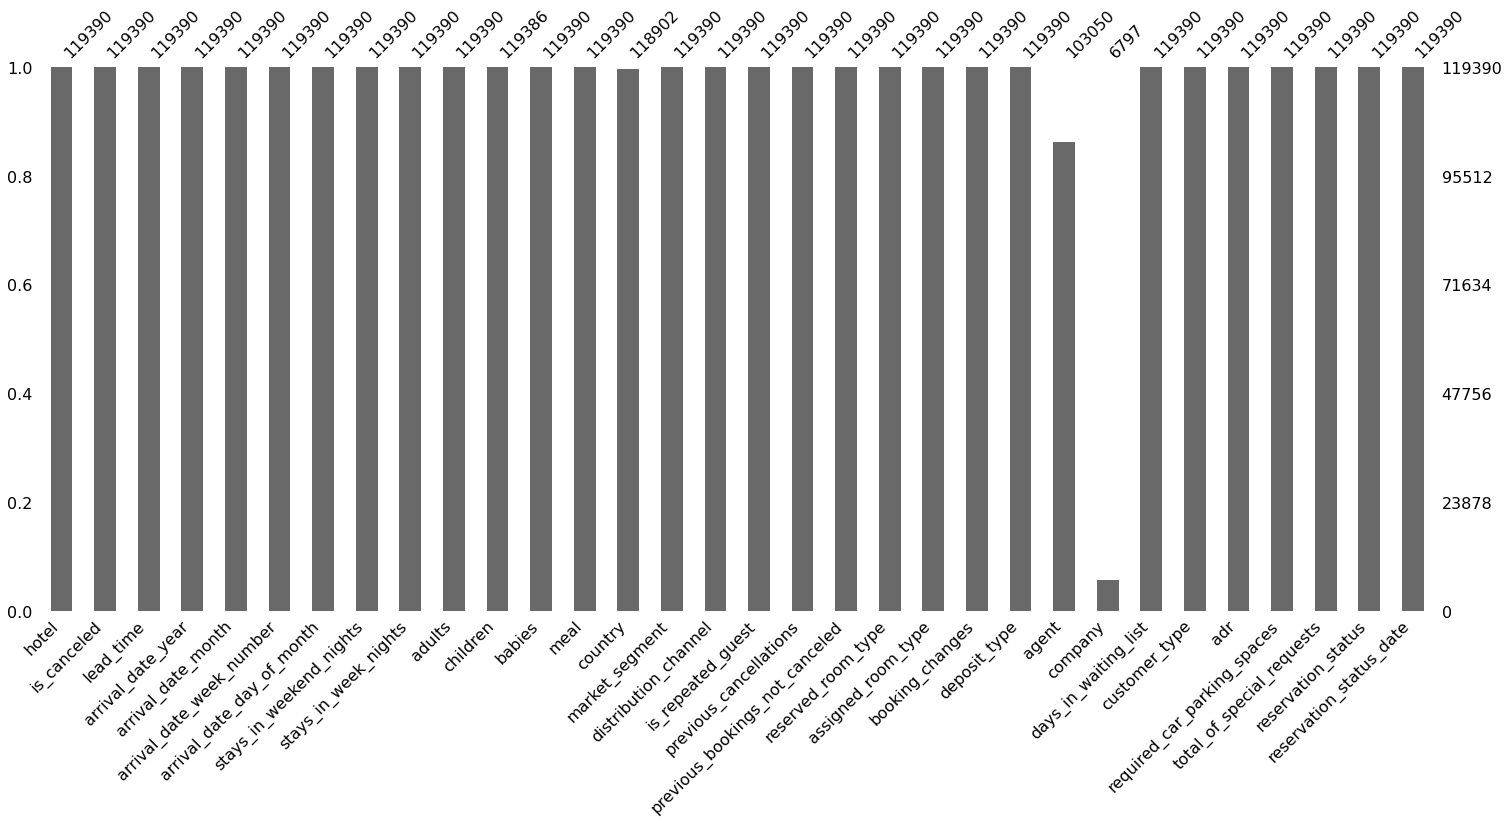

In [ ]:
#plotting data for easier understanding
#missingno is a great library for visualizing missing data.
msno.bar(dataset)

## **DATA WRANGLING FOR EDA**

In [ ]:
#view few NAN values in Children column for verification
dataset[dataset["children"].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


**Replace Null Values**

In [ ]:
#filling null values
replace_nan = {'country':'Not Available','agent':0,'company':0,'children':0}
dataset.fillna(value=replace_nan, inplace=True)

#checking count post replacing null/NAN
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Removing Duplicate rows**

In [ ]:
#checking duplicate values in dataset and deleting it.
dataset.loc[dataset.duplicated(),:]
#found 31994 duplciates in dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
#dropping duplicates
dataset.drop_duplicates(inplace=True)

#dataset shape post removing duplciates
dataset.shape

(87396, 32)

**Drop rows not required for easier analysis**

In [ ]:
#delete rows with no guests: no adult or children
dataset.drop(index=dataset[(dataset["adults"] == 0) & (dataset["children"] == 0)].index,inplace=True)

#shape of dataset post delete
dataset.shape
#so we can see 180 rows got deleted

(87230, 32)

# **EDA**

### **EDA - Total Cancellation**

In [ ]:
# booking metrics
Tot_booking=dataset["hotel"].count()
Cancl_booking=dataset[dataset["is_canceled"] == 1]["hotel"].count()
compl_booking=dataset[dataset["is_canceled"] == 0]["hotel"].count()

print("Total Booking Made:  {}".format(Tot_booking)) #119210
print("Cancelled Booking:  {}".format(Cancl_booking)) #44199
print("Booking completed:  {}".format(compl_booking)) #75011
print("percentage of cancelled booking: {} %".format(( (Cancl_booking/Tot_booking)  * 100).round(2))) #37.08 %

Total Booking Made:  87230
Cancelled Booking:  24009
Booking completed:  63221
percentage of cancelled booking: 27.52 %


[]

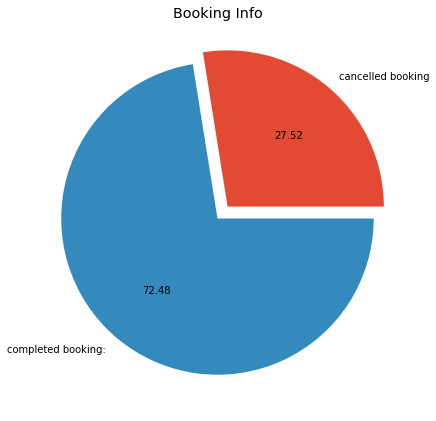

In [ ]:
#Plotting for easier understanding
plt.style.use("ggplot")

fig, ax = plt.subplots()
fig.set_size_inches(7, 10)

booking={"cancelled booking":Cancl_booking, "completed booking:":compl_booking}

ax.pie(booking.values(),labels=booking.keys(),autopct='%.2f',explode=[0.1,0])
ax.set_title("Booking Info")
plt.plot()

From the analysis, we can convey that, lot of cancellations being made nearly **30%**. 
It can be due to many reasons like pricing, location factor, cancellation post checking review, changes of plans of the customer etc. 
Need further analysis for conclusions.

### **EDA - Hotels with Higher Cancellation Rate**

In [ ]:
#getting list of hotels in the dataset
dataset["hotel"].unique()
# form the above command, We can sey this dataset contains only 2 Hotels: 'Resort Hotel', 'City Hotel'

array(['Resort Hotel', 'City Hotel'], dtype=object)

[]

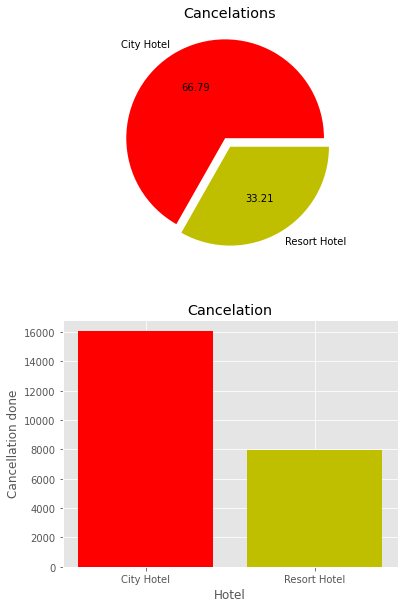

In [ ]:
# cancellation based on hotel
grouped_cancl=dataset[dataset["is_canceled"] == 1][["hotel","is_canceled"]].groupby('hotel').count()
grouped_cancl.rename(columns={'is_canceled':'cancellation_made'},inplace=True)
grouped_cancl

#plotting the same
plt.style.use('seaborn-bright')
fig1, ax1 = plt.subplots(2)
fig1.set_size_inches(6, 10)

ax1[0].pie(grouped_cancl["cancellation_made"],labels=grouped_cancl.index,autopct='%.2f',colors=['r','y'],explode=[0.1,0])
ax1[0].set_title("Cancelations")
plt.plot()

ax1[1].bar(grouped_cancl.index,grouped_cancl["cancellation_made"],color=['r','y'])
ax1[1].set_title("Cancelation")
ax1[1].set_xlabel("Hotel")
ax1[1].set_ylabel("Cancellation done")
plt.plot()

count
hotel        cancellation_done       
City Hotel   0                  37239
             1                  16035
Resort Hotel 0                  25982
             1                   7974

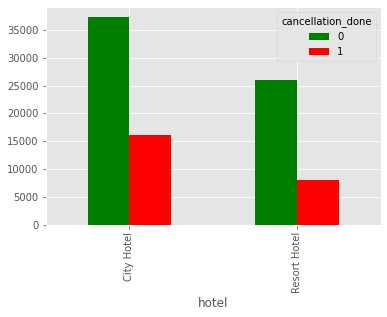

In [ ]:
#booking vs cancellation ratio hotel-wise
cancellations=dataset.rename(columns={'adults':'count','is_canceled':'cancellation_done'}).loc[:,['hotel','cancellation_done','count']].groupby(['hotel','cancellation_done']).count()

#inbuilt pandas plot using matplot
cancellations.unstack().plot(kind='bar',y='count',color=['g','r'])
cancellations

From the above anlysis, we can say **City hotel has higher cancellation rate compared to Resort hotel**.

It may be due to lot of options in City hotels compared to Resort hotels.

### **EDA - Based on Guest Country**

In [ ]:
#Cancelled booking by country 
cancl_country=dataset[dataset["is_canceled"] == 1].rename(columns={'adults':'count'})[["country","hotel","count"]].groupby(["country","hotel"]).count()
cancl_country.reset_index(inplace=True)
resort_hotel=cancl_country[cancl_country['hotel'] == 'Resort Hotel'][['country','count']]
city_hotel=cancl_country[cancl_country['hotel'] == 'City Hotel'][['country','count']]

In [ ]:
#plot City hotel cancelation map
basemap = folium.Map()
city_hotel_map = px.choropleth(city_hotel, locations = city_hotel['country'],
                           color = city_hotel['count'], hover_name = city_hotel['country'], title='City hotel Cancellation' )
city_hotel_map.show()

In [ ]:
#plot resort hotel cancelation map
resort_cancel_map = px.choropleth(resort_hotel, locations = resort_hotel['country'],
                           color = resort_hotel['count'], hover_name = resort_hotel['country'], title='Resort hotel cancellation')
resort_cancel_map.show()

[]

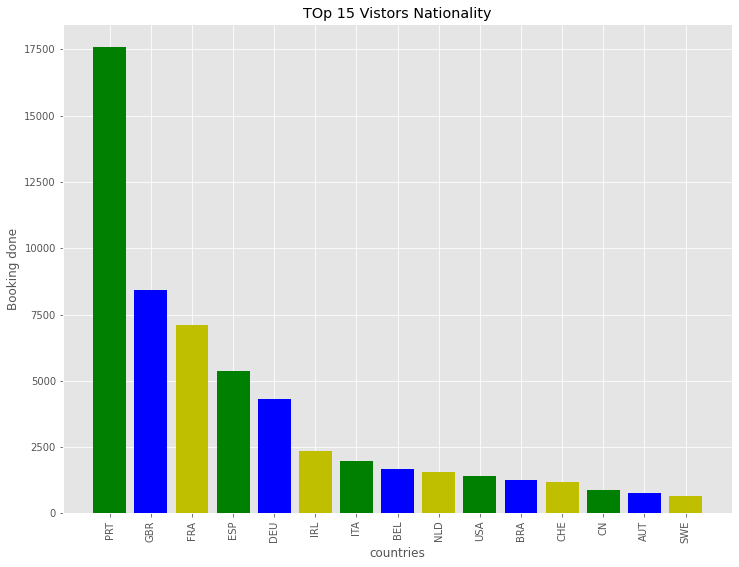

In [ ]:
#Vissitors booking by country 
visitors_country=dataset[dataset["is_canceled"] == 0].rename(columns={'adults':'count'})[["country","count"]].groupby(["country"]).count()

#visitors count by country
visitors_country.sort_values(by=['count'],ascending=False,inplace=True)

#plot top 15 most vistors countries:
top_15=visitors_country.iloc[0:15,]

fig3, ax3 = plt.subplots()
fig3.set_size_inches(12, 9)

ax3.bar(top_15.index,top_15['count'],color=['g','b','y'])
ax3.set_xlabel("countries")
ax3.set_xticklabels(labels=top_15.index, rotation = 90)
ax3.set_ylabel("Booking done")
ax3.set_title("TOp 15 Vistors Nationality")
plt.plot()

From the above graph and analysis, **We can see highest no.of customers are from Portual and most travelers are from Europe**. So Most probably the hotel should be present in  Europe.

### **EDA - Based on price during months**

In [ ]:
#Average Daily Rate(adr)
# there exist some outliers which we can remove later during ML model pre-processing 
dataset['adr'].describe()

count    87230.000000
mean       106.518031
std         54.891227
min         -6.380000
25%         72.250000
50%         98.200000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

In [ ]:
# seperate dataset for Resort and City hotel.
Resort_hotel=dataset[(dataset["is_canceled"] == 0) & (dataset["hotel"] == 'Resort Hotel')]
City_hotel=dataset[(dataset["is_canceled"] == 0) & (dataset["hotel"] == 'City Hotel')]

#Create Month in order for easier data understanding
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

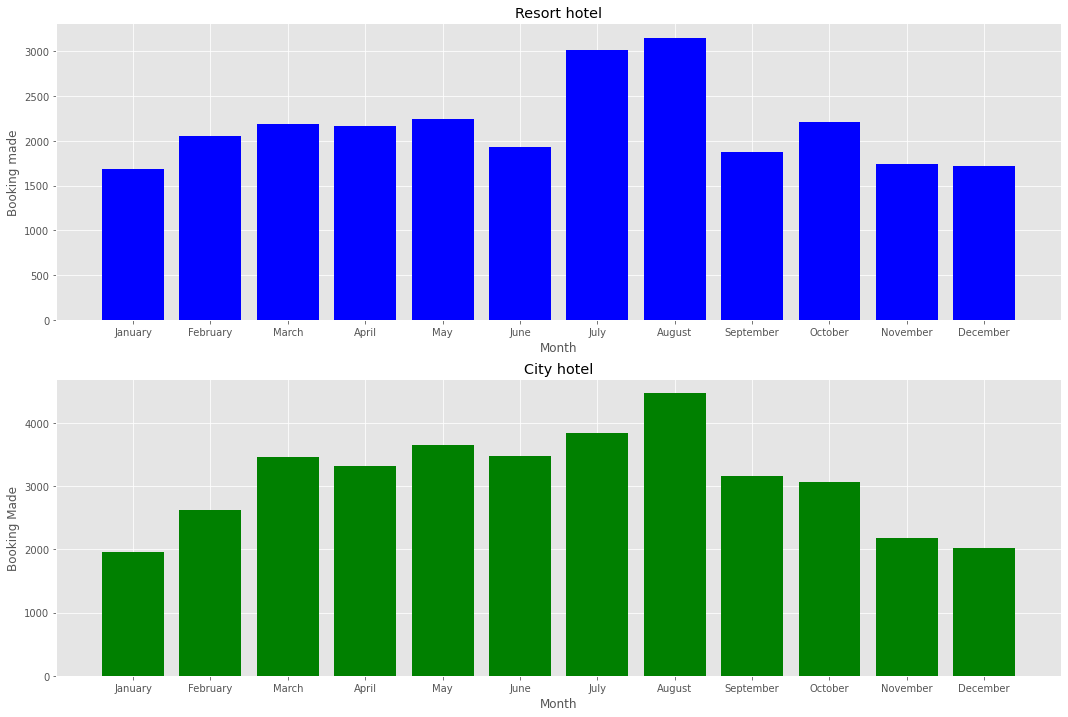

In [ ]:
# Months vs Booking counts comparison

Resort_hotel_booking = Resort_hotel.rename(columns={'adr':'count'}).groupby(['arrival_date_month'])['count'].count().reset_index()
City_hotel_booking= City_hotel.rename(columns={'adr':'count'}).groupby(['arrival_date_month'])['count'].count().reset_index()

Resort_hotel_booking['arrival_date_month'] = pd.Categorical(Resort_hotel_booking['arrival_date_month'], categories=new_order, ordered=True)
Resort_hotel_booking.sort_values(by=['arrival_date_month'],inplace=True)

City_hotel_booking['arrival_date_month'] = pd.Categorical(City_hotel_booking['arrival_date_month'], categories=new_order, ordered=True)
City_hotel_booking.sort_values(by=['arrival_date_month'],inplace=True)

#convert datatype for plotting
Resort_hotel_booking['arrival_date_month'] = Resort_hotel_booking['arrival_date_month'].astype('str')
City_hotel_booking['arrival_date_month'] = City_hotel_booking['arrival_date_month'].astype('str')


fig, ax7 = plt.subplots(2)
fig.set_size_inches(18, 12)

ax7[0].bar(Resort_hotel_booking['arrival_date_month'],Resort_hotel_booking['count'], color='b')
ax7[1].bar(City_hotel_booking['arrival_date_month'],City_hotel_booking['count'], color ='g')

ax7[0].set_xlabel('Month')
ax7[1].set_xlabel('Month')

ax7[0].set_ylabel('Booking made')
ax7[1].set_ylabel('Booking Made')

ax7[0].set_title('Resort hotel')
ax7[1].set_title('City hotel')

plt.show()

Since **demand for hotel bookings are higher during Summer and Fall**,hence it may lead  to higher price, being  vacation period.

In [ ]:
# find mean value per month for ADR to compare.
Resort_hotel_monthly = Resort_hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()
City_hotel_monthly= City_hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
hotels=Resort_hotel_monthly.merge(City_hotel_monthly, on = 'arrival_date_month',  suffixes=('_Resort','_City')).sort_values(by=['arrival_date_month'])

hotels['arrival_date_month'] = pd.Categorical(hotels['arrival_date_month'], categories=new_order, ordered=True)
hotels.sort_values(by=['arrival_date_month'],inplace=True)

#convert datatype for plotting
hotels['arrival_date_month'] = hotels['arrival_date_month'].astype('str')

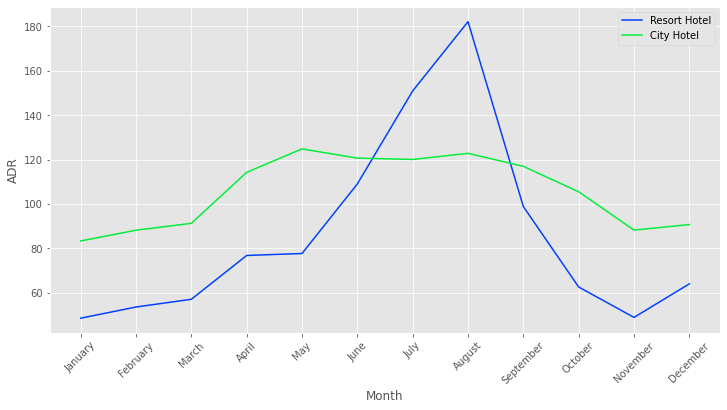

In [ ]:
#plotitng via line chart for visual understanding of price per month.
fig5, ax5 = plt.subplots()

fig5.set_size_inches(12,6)

ax5.plot(hotels['arrival_date_month'],hotels['adr_Resort'], label="Resort Hotel")
ax5.plot(hotels['arrival_date_month'],hotels['adr_City'], label="City Hotel")

ax5.set_xlabel("Month")
ax5.set_ylabel("ADR")

ax5.legend()
plt.xticks(rotation = 45)
plt.show()

From the plot, We can see that **the price is Peak during the Months of Summer and begining of Fall season** and very less during Spring begining and during winter

### **EDA - Room type requested VS assigned**

In [ ]:
# Available room types in hotel
dataset['assigned_room_type'].unique()
#there are 12 types of rooms assigned to guest.

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K'],
      dtype=object)

In [ ]:
#Guest most requested room types vs assigned Resort hotel
Resort_reserved_room_type = Resort_hotel.rename(columns={'hotel':'count'}).groupby(by=['reserved_room_type'])['count'].count().reset_index()
Resort_assigned_room_type = Resort_hotel.rename(columns={'hotel':'count'}).groupby(by=['assigned_room_type'])['count'].count().reset_index()

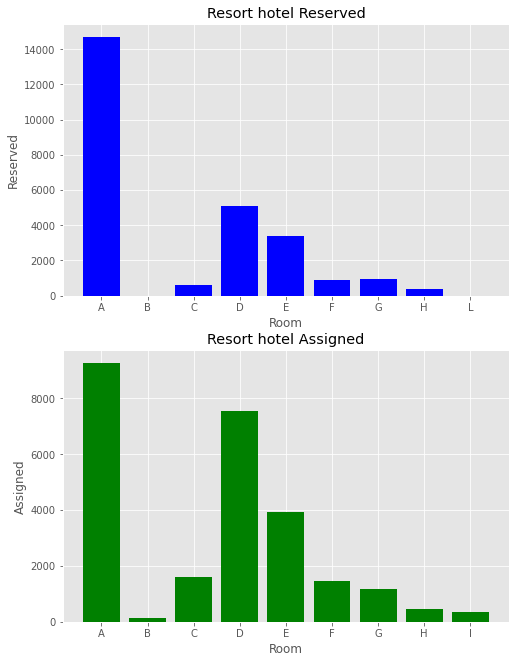

In [ ]:
#plot Resort hotel
fig, ax9 = plt.subplots(2)
fig.set_size_inches(8, 11)

ax9[0].bar(Resort_reserved_room_type['reserved_room_type'],Resort_reserved_room_type['count'], color='b')
ax9[1].bar(Resort_assigned_room_type['assigned_room_type'],Resort_assigned_room_type['count'], color ='g')

ax9[0].set_xlabel('Room')
ax9[1].set_xlabel('Room')

ax9[0].set_ylabel('Reserved')
ax9[1].set_ylabel('Assigned')

ax9[0].set_title('Resort hotel Reserved')
ax9[1].set_title('Resort hotel Assigned')

plt.show()

In [ ]:
#Guest most requested room types vs assigned City hotel
City_reserved_room_type= City_hotel.rename(columns={'hotel':'count'}).groupby(by=['reserved_room_type'])['count'].count().reset_index()
City_assigned_room_type= City_hotel.rename(columns={'hotel':'count'}).groupby(by=['assigned_room_type'])['count'].count().reset_index()

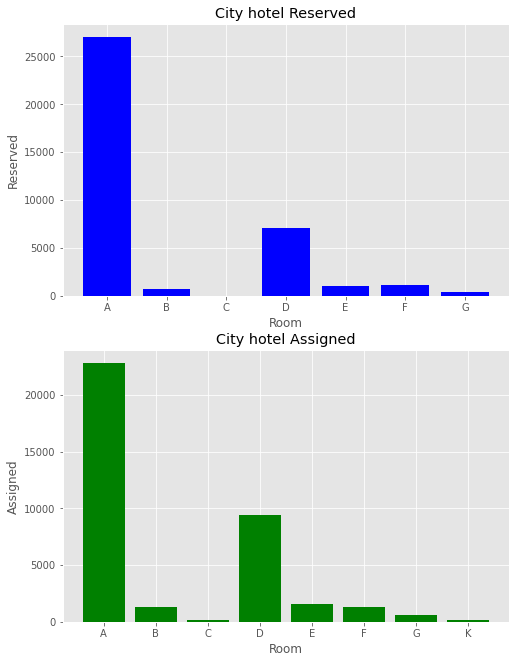

In [ ]:
#plotting for easier understanding
#City Hotel
#plot City hotel
fig, ax10 = plt.subplots(2)
fig.set_size_inches(8, 11)

ax10[0].bar(City_reserved_room_type['reserved_room_type'],City_reserved_room_type['count'], color='b')
ax10[1].bar(City_assigned_room_type['assigned_room_type'],City_assigned_room_type['count'], color ='g')

ax10[0].set_xlabel('Room')
ax10[1].set_xlabel('Room')

ax10[0].set_ylabel('Reserved')
ax10[1].set_ylabel('Assigned')

ax10[0].set_title('City hotel Reserved')
ax10[1].set_title('City hotel Assigned')

plt.show()

From the analysis, we can see that **guest booking room category changes from assigned category**. This may be due to rooms unavailablity in requsted category or customer upgrade/downgrade to higher/lower category during visit or hotels providing customers with free upgrade to higher suite.

### **EDA - Guest With Children/Babies**

In [ ]:
Resort_travel_children = Resort_hotel[ (Resort_hotel['children'] > 0) | (Resort_hotel['babies'] > 0)]['hotel'].count()
print('Percentage travellers with Children/Babies : {} %'.format(Resort_travel_children/Resort_hotel['hotel'].count() * 100))

Percentage travellers with Children/Babies : 9.641290123931952 %


In [ ]:
City_travel_children = City_hotel[ (City_hotel['children'] > 0) | (City_hotel['babies'] > 0)]['hotel'].count()
print('Percentage travellers with Children/Babies : {} %'.format(City_travel_children/City_hotel['hotel'].count() * 100))

Percentage travellers with Children/Babies : 9.345041488761781 %


From the Analysis, we can say that **travellers with children/babies are very less**

### **EDA - Repeated Guests**

In [ ]:
Resort_travel_repeated = Resort_hotel[(Resort_hotel['is_repeated_guest'] == 1)] ['hotel'].count()
print('Resort Hotel - Percentage of repeated Travellers: {} %'.format((Resort_travel_repeated/Resort_hotel['hotel'].count() * 100).round(2)))

Resort Hotel - Percentage of repeated Travellers: 6.29 %


In [ ]:
City_travel_repeated = City_hotel[(City_hotel['is_repeated_guest'] == 1)] ['hotel'].count()
print('City Hotel - Percentage of repeated Travellers: {} %'.format((City_travel_repeated/City_hotel['hotel'].count() * 100).round(2)))

City Hotel - Percentage of repeated Travellers: 3.94 %


From the Analysis, we can say that **repeated guest to same hotel is pretty much less** as it is quite obvious

### **EDA - Booking made by agent**

In [ ]:
Resort_travel_repeated = Resort_hotel[(Resort_hotel['agent'] != 0)] ['hotel'].count()
print('Resort - Booking made with agent: {} %'.format((Resort_travel_repeated/Resort_hotel['hotel'].count() * 100).round(2)))

City_travel_repeated = City_hotel[(City_hotel['agent'] != 0)] ['hotel'].count()
print('City - Booking made with agent: {} %'.format((City_travel_repeated/City_hotel['hotel'].count() * 100).round(2)))

Resort - Booking made with agent: 77.39 %
City - Booking made with agent: 87.33 %


Almost **all booking were made with agents** and only few  were made directly it seems

### **EDA - Market Segment**

In [ ]:
Resort_hotel_market=Resort_hotel.rename(columns={'hotel':'count'}).groupby(Resort_hotel['market_segment'])['count'].count().reset_index()
City_hotel_market=City_hotel.rename(columns={'hotel':'count'}).groupby(City_hotel['market_segment'])['count'].count().reset_index()

#add aviation category to resort hotel
add_category={'market_segment':'Aviation','count':0}

Resort_hotel_market = Resort_hotel_market.append(add_category,ignore_index=True)
Resort_hotel_market = Resort_hotel_market.sort_values(by=['market_segment']).reset_index(drop=True)
print("Resort Hotel:\n")
print(Resort_hotel_market,'\n---------------------------\n\nCity Hotel:\n\n',City_hotel_market)

Resort Hotel:

  market_segment  count
0       Aviation      0
1  Complementary    158
2      Corporate   1736
3         Direct   5417
4         Groups   1858
5  Offline TA/TO   5816
6      Online TA  10997 
---------------------------

City Hotel:

   market_segment  count
0       Aviation    181
1  Complementary    449
2      Corporate   1955
3         Direct   4626
4         Groups   1732
5  Offline TA/TO   5982
6      Online TA  22314


[]

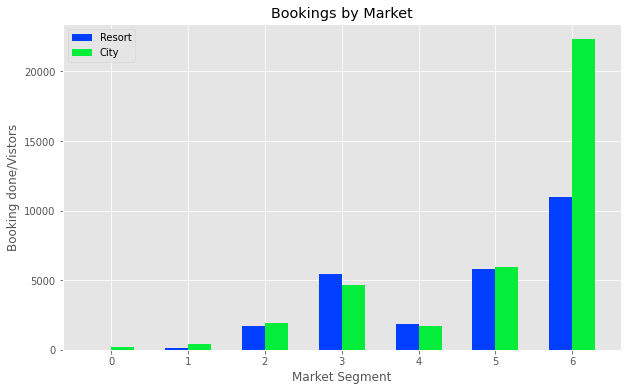

In [ ]:
#Plot for easier understanding
fig6, ax6 = plt.subplots()

fig6.set_size_inches(10,6)
x = np.arange(len(Resort_hotel_market.index))  # the label locations
width = 0.3  # the width of the bars

ax6.bar(x - width/2, Resort_hotel_market['count'], width, label='Resort')
ax6.bar(x + width/2, City_hotel_market['count'], width, label='City')
ax6.legend()
ax6.set_xlabel("Market Segment")
ax6.set_ylabel("Booking done/Vistors")
ax6.set_title("Bookings by Market")

plt.plot()

From the analysis, We can say that Most predominent market segment being **online TA(6) , Offline TA/TO(5) and Direct(3)**

# **CREATING ML MODELS FOR PREDICTING BOOKING CANCELATION(0/1)**

### **FINDING DATA CORRELATION & DATA PREPROCESSING FOR ML MODEL**

In [ ]:
#finding coreletation in numerical features for is_cancellation
cancel_corr = dataset.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[:]

is_canceled                       1.000000
lead_time                         0.184515
required_car_parking_spaces       0.184456
adr                               0.127233
total_of_special_requests         0.120794
booking_changes                   0.093236
is_repeated_guest                 0.088764
arrival_date_year                 0.088020
stays_in_week_nights              0.084159
adults                            0.080271
company                           0.075314
children                          0.067182
stays_in_weekend_nights           0.060992
previous_bookings_not_canceled    0.052178
previous_cancellations            0.051501
babies                            0.020627
arrival_date_day_of_month         0.005449
days_in_waiting_list              0.004710
arrival_date_week_number          0.001691
agent                             0.001145
Name: is_canceled, dtype: float64

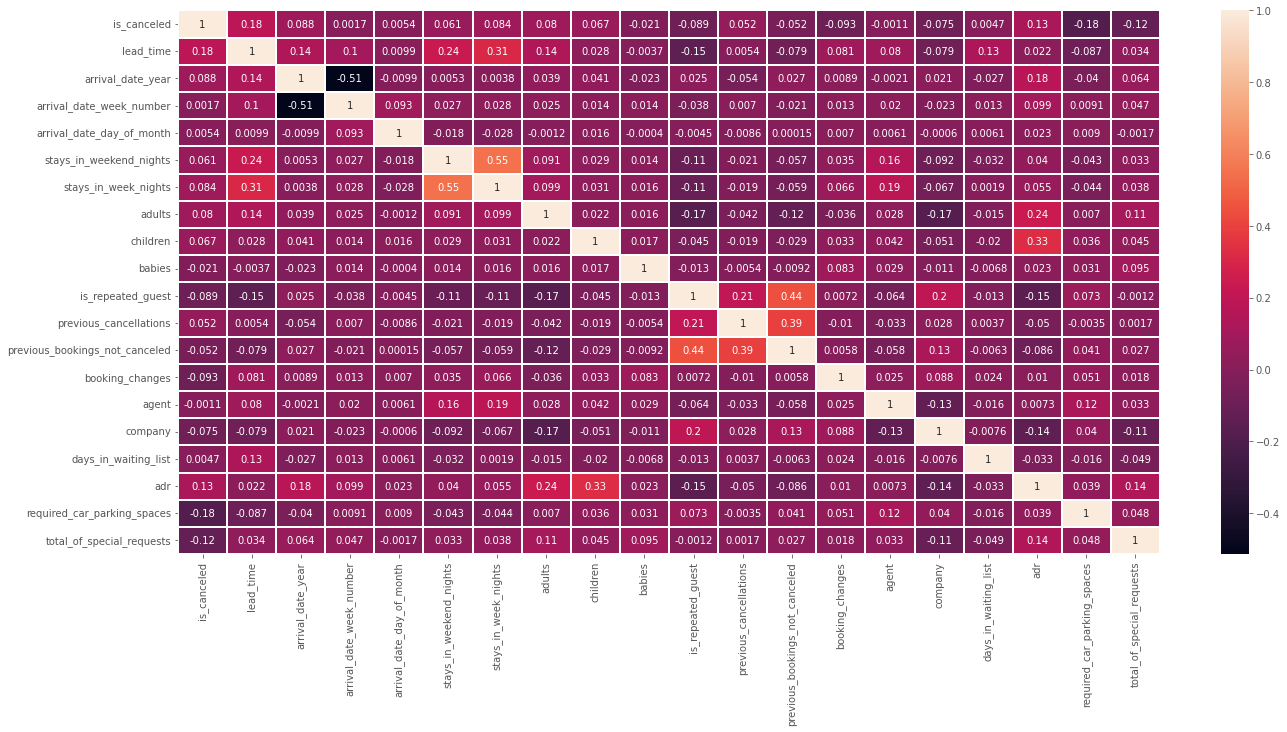

In [ ]:
# plot the corelations
plt.figure(figsize = (22, 10))

sns.heatmap(dataset.corr(), annot = True, linewidths = 1)
plt.show()

[]

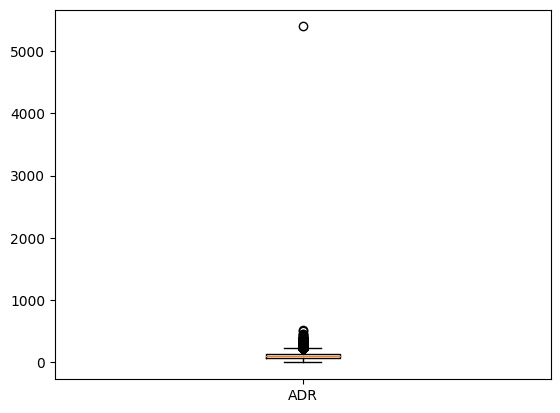

In [ ]:
#Check outliers in adr feature
plt.style.use('default')
fig, ax8 = plt.subplots()
ax8.boxplot(dataset["adr"])
ax8.set_xticklabels(labels=['ADR'])
plt.plot()

In [ ]:
#Remove outlier using percentile
dataset.drop(dataset[(dataset['adr'] > dataset['adr'].quantile(0.99)) | (dataset['adr'] < dataset['adr'].quantile(0.02))].index,inplace=True)

[]

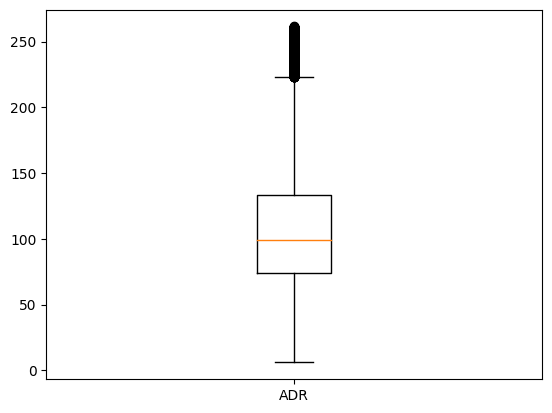

In [ ]:
#plotting post outlier removal
plt.style.use('default')
fig, ax8 = plt.subplots()
ax8.boxplot(dataset["adr"])
ax8.set_xticklabels(labels=['ADR'])
plt.plot()

In [ ]:
# getting categorical features and convert categorical to numeric features
category_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
cat_dataset = dataset[category_cols]
cat_dataset.dtypes

hotel                      object
arrival_date_month         object
meal                       object
country                    object
market_segment             object
distribution_channel       object
reserved_room_type         object
assigned_room_type         object
deposit_type               object
customer_type              object
reservation_status         object
reservation_status_date    object
dtype: object

In [ ]:
#converting reservation_status_date to necessary year,month,day
cat_dataset.loc[:,'reservation_status_date'] = pd.to_datetime(cat_dataset.loc[:,'reservation_status_date'])
cat_dataset.loc[:,'year'] = cat_dataset.loc[:,'reservation_status_date'].dt.year
cat_dataset.loc[:,'month'] = cat_dataset.loc[:,'reservation_status_date'].dt.month
cat_dataset.loc[:,'day'] = cat_dataset.loc[:,'reservation_status_date'].dt.day

In [ ]:
#remove duplicate columns
cat_dataset.drop(['reservation_status_date'] , axis = 1, inplace = True)

In [ ]:
#checking datatypes
cat_dataset.dtypes

hotel                   object
arrival_date_month      object
meal                    object
country                 object
market_segment          object
distribution_channel    object
reserved_room_type      object
assigned_room_type      object
deposit_type            object
customer_type           object
reservation_status      object
year                     int64
month                    int64
day                      int64
dtype: object

In [ ]:
#printing unique values in each feature
for col in cat_dataset.columns[:-3]:
    print("{} : {}\n".format(col,cat_dataset[col].unique()))

hotel : ['Resort Hotel' 'City Hotel']

arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']

country : ['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'FRA' 'Not Available' 'ROU' 'NOR' 'OMN'
 'ARG' 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE'
 'AUS' 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN'
 'MEX' 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR'
 'ZAF' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'AGO' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN'
 'PHL' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'STP' 'SEN' 'KNA

In [ ]:
#Converting categorical to numeric using pandas ngroup.
# we can also use one-hot encoding using pandas dummies since it creates lot of column, using ngroups for simplicity.
# we can also map values ourselves using map function
hotel = cat_dataset.groupby('hotel').ngroup()
arrival_date_month=cat_dataset.groupby('arrival_date_month').ngroup()
meal = cat_dataset.groupby('meal').ngroup()
country= cat_dataset.groupby('country').ngroup()
market_segment = cat_dataset.groupby('market_segment').ngroup()
distribution_channel = cat_dataset.groupby('distribution_channel').ngroup()
reserved_room_type = cat_dataset.groupby('reserved_room_type').ngroup()
assigned_room_type = cat_dataset.groupby('assigned_room_type').ngroup()
deposit_type = cat_dataset.groupby('deposit_type').ngroup()
customer_type = cat_dataset.groupby('customer_type').ngroup()
reservation_status = cat_dataset.groupby('reservation_status').ngroup()

cat_dataset_convert = pd.concat([hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status], axis=1)
cat_dataset_convert.columns=['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']
cat_dataset_final = cat_dataset_convert.merge(cat_dataset, left_index=True, right_index=True)
cat_dataset_final = cat_dataset_final.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,22,23,24]]
cat_dataset_final

,hotel_x,arrival_date_month_x,meal_x,country_x,market_segment_x,distribution_channel_x,reserved_room_type_x,assigned_room_type_x,deposit_type_x,customer_type_x,reservation_status_x,year,month,day
2,1,5,0,57,3,1,0,2,0,2,1,2015,7,2
3,1,5,0,57,2,0,0,0,0,2,1,2015,7,2
4,1,5,0,57,6,3,0,0,0,2,1,2015,7,3
6,1,5,0,134,3,1,2,2,0,2,1,2015,7,3
7,1,5,1,134,3,1,2,2,0,2,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,14,5,3,0,0,0,2,1,2017,9,6
119386,0,1,0,54,6,3,4,4,0,2,1,2017,9,7
119387,0,1,0,42,6,3,3,3,0,2,1,2017,9,7
119388,0,1,0,57,6,3,0,0,0,2,1,2017,9,7


In [ ]:
#renaming columns to remove '_x' from name
cat_dataset_final.columns=['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','Year','Month','Day']
cat_dataset_final

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,Year,Month,Day
2,1,5,0,57,3,1,0,2,0,2,1,2015,7,2
3,1,5,0,57,2,0,0,0,0,2,1,2015,7,2
4,1,5,0,57,6,3,0,0,0,2,1,2015,7,3
6,1,5,0,134,3,1,2,2,0,2,1,2015,7,3
7,1,5,1,134,3,1,2,2,0,2,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,14,5,3,0,0,0,2,1,2017,9,6
119386,0,1,0,54,6,3,4,4,0,2,1,2017,9,7
119387,0,1,0,42,6,3,3,3,0,2,1,2017,9,7
119388,0,1,0,57,6,3,0,0,0,2,1,2017,9,7


In [ ]:
# getting numeric Features
numeric_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']
numeric_dataset = dataset[numeric_cols]
numeric_dataset

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1
6,0,0,2015,27,1,0,2,2,0.0,0,0,0,0,0,0.0,0.0,0,107.00,0,0
7,0,9,2015,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0.0,0,103.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,104.40,0,0


In [ ]:
#Now merge 2 dataframes (categorical and numeric)
Final_Model_Dataset = numeric_dataset.merge(cat_dataset_final, left_index=True, right_index=True)
Final_Model_Dataset.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,Year,Month,Day
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.0,0,0,1,5,0,57,3,1,0,2,0,2,1,2015,7,2
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.0,0,0,1,5,0,57,2,0,0,0,0,2,1,2015,7,2
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.0,0,1,1,5,0,57,6,3,0,0,0,2,1,2015,7,3
6,0,0,2015,27,1,0,2,2,0.0,0,0,0,0,0,0.0,0.0,0,107.0,0,0,1,5,0,134,3,1,2,2,0,2,1,2015,7,3
7,0,9,2015,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0.0,0,103.0,0,1,1,5,1,134,3,1,2,2,0,2,1,2015,7,3


In [ ]:
#Finding coreleation post converting all dataypes to nuemric
cancel_corr = Final_Model_Dataset.corr()["is_canceled"]
print("Co-related values for cancelation :\n\n{}".format(cancel_corr.abs().sort_values(ascending=False)[1:]))

Co-related values for cancelation :

reservation_status                0.889392
required_car_parking_spaces       0.184621
lead_time                         0.182912
market_segment                    0.180949
distribution_channel              0.149111
deposit_type                      0.138416
adr                               0.126170
total_of_special_requests         0.119903
country                           0.102714
Month                             0.097222
booking_changes                   0.091488
arrival_date_year                 0.086086
adults                            0.082652
is_repeated_guest                 0.082120
stays_in_week_nights              0.078605
company                           0.076165
hotel                             0.075562
children                          0.063353
assigned_room_type                0.060089
stays_in_weekend_nights           0.055692
previous_cancellations            0.053663
previous_bookings_not_canceled    0.050114
meal             

From the above analysis only few features are corelated to **Is_Cancellation**. For Learning pirpose, we are going to use all features since we have converted all categorical features to numerical. 

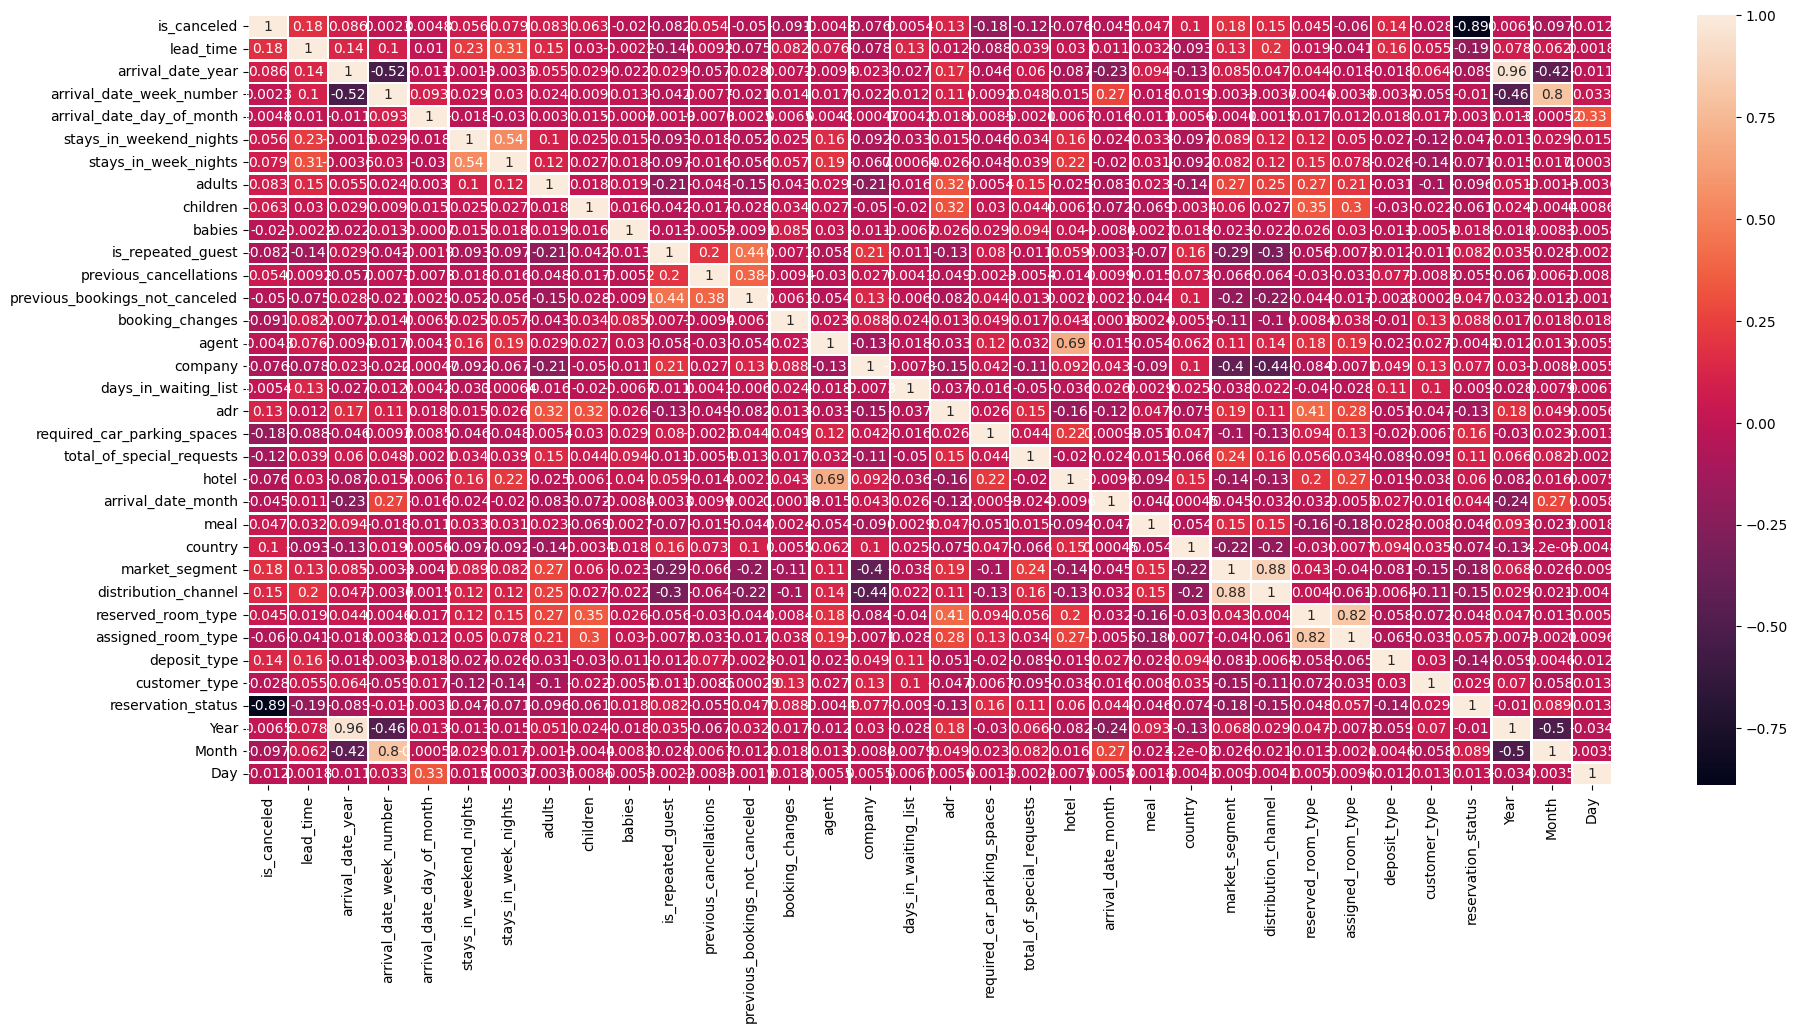

In [ ]:
# plot the correlations
plt.figure(figsize = (22, 10))

sns.heatmap(Final_Model_Dataset.corr(), annot = True, linewidths = 1)
plt.show()

### **FINAL DATASET FOR THE MODEL**

In [ ]:
#Dataset
#remove reservation status since it has quite direct info on cancellation
X = Final_Model_Dataset.drop(['is_canceled','reservation_status'], axis=1)

#Prediction attribute
y = Final_Model_Dataset['is_canceled']
print(X)

        lead_time  arrival_date_year  ...  Month  Day
2               7               2015  ...      7    2
3              13               2015  ...      7    2
4              14               2015  ...      7    3
6               0               2015  ...      7    3
7               9               2015  ...      7    3
...           ...                ...  ...    ...  ...
119385         23               2017  ...      9    6
119386        102               2017  ...      9    7
119387         34               2017  ...      9    7
119388        109               2017  ...      9    7
119389        205               2017  ...      9    7

[84651 rows x 32 columns]


### **ML CLASSIFICATION ALGORITHMS**

####**KNN**

In [ ]:
# Import the necessary modules for ML model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps: added scaler to improve model efficiency to normalize values(have  used standard scaler) and passed the KNN algorithms
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# have paased less range value of hyperparamter since i'm using free tier version of google colab.
k_range = list(range(3, 6))
parameters = dict(knn__n_neighbors=k_range)

# Create train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#increasing cv score takes lot of time in gooogle colab, so kept it just 2.
cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

Knn_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
print("Accuracy: {}".format(Knn_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8562653199846431
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     24487
           1       0.81      0.63      0.71      9374

    accuracy                           0.86     33861
   macro avg       0.84      0.79      0.81     33861
weighted avg       0.85      0.86      0.85     33861

Tuned Model Parameters: {'knn__n_neighbors': 5}


#### **LOGISTIC REGRESSION**

In [ ]:
# Import the necessary modules for ML model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps: added scaler to improve model efficiency to normalize values(have  used standard scaler) and then LR algorithms
steps = [('scaler', StandardScaler()),
        ('lr', LogisticRegression())]
        
# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

#parameters for gridsearchcv if we increase range of entries from 5 to higher value, we can get greater accurange
c_space = np.logspace(-4, 4, 3)
parameters = {'lr__C': c_space,'lr__penalty': [None, 'l2']} 

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#call GridSearchCV and set crossvalscore to 2
cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
LR_Accuracy = cv.score(X_test, y_test)

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(LR_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9709400194914504
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24487
           1       0.99      0.90      0.95      9374

    accuracy                           0.97     33861
   macro avg       0.98      0.95      0.96     33861
weighted avg       0.97      0.97      0.97     33861

Tuned Model Parameters: {'lr__C': 10000.0, 'lr__penalty': 'l2'}


#### **SVM**

In [ ]:
# Import the necessary modules for ML model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space, if we increase the penalty(c) and gamma value the accurancy can be increased.
#since it takes lots of time in google colab provided only a single value
parameters = {'SVM__C':[10],'SVM__gamma':[1]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=21)

#Grissearchcv with cross val score process takes lot of time in colab for SVM so commenting it. 
#cv = GridSearchCV(pipeline,parameters,cv=3)

# Fit to the training set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
SVM_Accuracy=pipeline.score(X_test, y_test)
print("Accuracy: {}".format(SVM_Accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.922595316145418
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24530
           1       0.99      0.73      0.84      9331

    accuracy                           0.92     33861
   macro avg       0.95      0.86      0.89     33861
weighted avg       0.93      0.92      0.92     33861



###**ACCURACY COMPARISON OF ALL ML MODELS**

In [ ]:
print("Accuracy of All Models")
print("\n")
print("Knn:{} %".format(Knn_Accuracy))
print("\n")
print("Logistic Regression:{}%".format(LR_Accuracy))
print("\n")
print("SVM :{}%".format(SVM_Accuracy))

Accuracy of All Models


Knn:0.8562653199846431 %


Logistic Regression:0.9709400194914504%


SVM :0.922595316145418%


*The performance of  few ML algorithms can be increased to nearly **99 percent** by tuning the hyper parameters. Since It takes a lot  of tIme in colab, have kept the parameter in a smaller scale.*